<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

import warnings
warnings.simplefilter('ignore')

# **Regressão Linear**

Em estatística, Regressão linear é uma equação para se usa para estimar o valor esperado de uma variável, $y$, em função dos valores de algumas outras variáveis $x_1, x_2,...,x_r$.
Os modelos de regressão linear têm uma ampla gama de aplicações em diversas áreas.

- Estudo da relação entre a renda e a educação.
- Análise do impacto de tratamentos médicos em resultados de pacientes.
- Estimativa de vendas com base em despesas com publicidade.
- Análise da relação entre velocidade e consumo de combustível em veículos.
- Previsão de níveis de água em rios com base em dados meteorológicos.

Antes de utilizar um modelo de regressão linear, é importante avaliar a relação linear entre as variáveis de interesse. Para isso, é possível empregar gráficos de dispersão (scatterplots) e calcular o coeficiente de correlação.

**Gráficos de disperssão (scatterplots):** são uma ferramenta visual útil na análise de dados para explorar a relação entre duas variáveis.

<img src="http://www.orlandoalbarracin.com.br/phyton/scatter.png" width=400, align="left">

**Coeficiente de correlação ($r$):** mede a força linear entre as variáveis independentes e dependentes. Seu valor varia de -1 a 1.

- Um valor de $r$ próximo a 1 indica que à medida que uma variável aumenta, a outra também tende a aumentar.
- Um valor de $r$ próximo a -1 indica que à medida que uma variável aumenta, a outra tende a diminuir.
- Um valor de $r$ próximo a 0 indica uma correlação linear fraca ou inexistente entre as variáveis.

## Regressão Linear Simples








Permite modelar a relação entre duas variáveis, uma sendo a variável resposta $y$ e a outra sendo preditora ou explicativa. Essa técnica assume que essa relação pode ser aproximada por uma linha reta.

$$y_i=\beta_0 + \beta_1 x_i + ϵ_i,$$


em que, y é a variável que tentamos prever; x é variável explicativa; $\beta_0$ é o intercepto; $\beta_1$ é o coeficiente angular e $\epsilon$ o erro.


<img src="http://www.orlandoalbarracin.com.br/phyton/reg.png" width=400, align="left">


O objetivo da regressão linear simples é encontrar os valores ideais para $\beta_0$ e $\beta_1$ que minimizam o erro total. Assim,

$$\epsilon_i = y_i -(\beta_0 + \beta_1 x_i )$$

Os valores de $\beta_0$ e $\beta_1$ podem ser encontrados (estimados) por meio do método de  Mínimos Quadrados Ordinários (MQO) ou OLS (do inglês Ordinary Least Squares)

$$OLS(\beta_0, \beta_1)=\sum_{i=1}^{n} \widehat{\epsilon}^2_i= \sum_{i=1}^{n}(y_i -\beta_0 - \beta_1 x_i )^2,$$


em que $\widehat{\epsilon}_i$ é a diferença entre os valor observado e previstos da variável y.



Derivando em relação a $\beta_0$ e $\beta_1$ utilizando a regra da cadeia e então igualar a zero podemos encontrar os valores de $\beta_0$ e $\beta_1$ que minimizam $OLS(\beta_0, \beta_1)$, isto é, a soma do quadrados dos erros. Aqui usaremos a biblioteca `statsmodels` para estimar os parâmetros.

### Exemplo - Sales/Marketing

Construa um modelo de regressão linear para analisar a relação entre as vendas de um produto e o orçamento destinado à publicidade para três mídias: TV, rádio e jornal.

In [ ]:
df=pd.read_csv("http://www.orlandoalbarracin.com.br/phyton/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


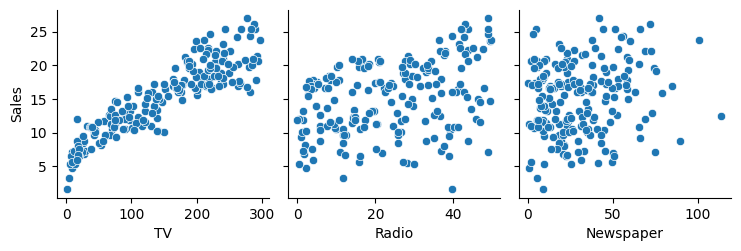

In [ ]:
sns.pairplot(df,
             x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars='Sales',
             kind='scatter')
plt.show()

Note que podemos assumir que a variável `Sales` está relacionada linearmente com a variável `TV`. O que podemos dizer com relação às variáveis `Radio` e `Newspaper`?

In [ ]:
# Correlação linear:

df.corr()[["Sales"]]

,Sales
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


Vamos ajustar um modelo de regressão para analisar as vendas `(Sales)` segundo a variável `TV`.

In [ ]:
# Fit the resgression line using 'OLS'

model = sm.ols(formula='Sales ~ TV', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           7.93e-74
Time:                        13:53:30   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

$$\widehat{y} = 6.9748+ 0.055x, $$

em que $\widehat{y}$ é a venda (`Sales`) esperada quando é investido $x$ dinheiro de marketing de TV.

- Note que o valor-p (P>|t|) para a variável `TV` é 0.000 ($<$0.05). Indicando que o orçamento destinado à publicidade em TV influência, estatísticamente, nas vendas.

- Note que o `R-squared` é de 0.812. O que isso significa?

**O coeficiente de determinação $(R^2)$:** é uma medida que indica o quanto a variabilidade da variável dependente é explicada pelas variáveis independentes em um modelo de regressão linear. Varia entre 0 e 1.

**Valores previstos pelo modelo de regressão!**

Como construir a reta de regressão?
Podemos calcular os valores preditos usando o modelo $6.9748+ 0.055x$ substituindo cada valor de $x$ pelo valor observado.

In [ ]:
df['predicted'] = model.predict(df.TV)
df.head()

,TV,Radio,Newspaper,Sales,predicted
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852


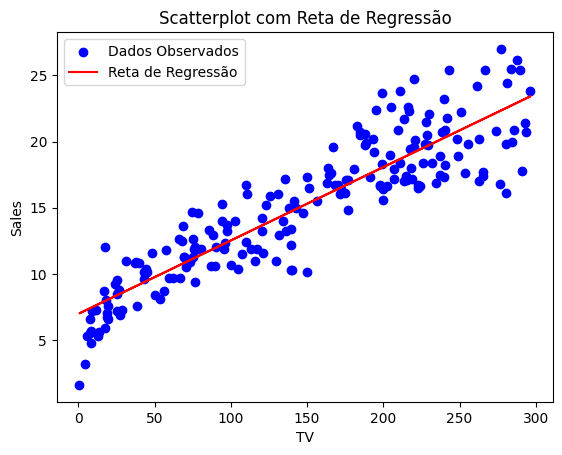

In [ ]:
# Scatterplot com Reta de Regressão

plt.scatter(df.TV, df.Sales, color='blue', label='Dados Observados')
plt.plot(df.TV, df.predicted, color='red', label='Reta de Regressão')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatterplot com Reta de Regressão')
plt.legend()
plt.show()

Usando o modelo de regressão linear ajustado. Qual é o valor de vendas (`Sales`) esperado quando o orçamento em TV é de 153?

In [ ]:
# Prevendo para novos valores (não estão na base de dados)

new_value=pd.DataFrame({'TV': [153]})

model.predict(new_value)

0    15.460931
dtype: float64

In [ ]:
# Obtendo os intervalos de confiança de 95% para as previsões

model.get_prediction(new_value).conf_int()

array([[15.14003275, 15.78182999]])

**Análise de resíduos**

Um pressuposto que geralmente deve ser verificado nos modelos de regressão é que os resíduos devem ser aleatórios com média zero e seguir aproximadamente uma distribuição normal. Quando essas suposições são satisfeitas, isso sugere que o modelo de regressão linear é apropriado para descrever a relação entre as variáveis.

In [ ]:
# Resíduos

residuals = model.resid_pearson

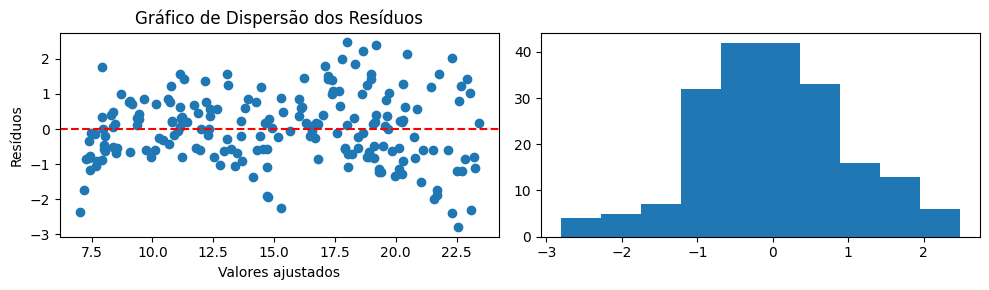

In [ ]:
# Gráfico de dispersão dos resíduos

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(df["predicted"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals)

plt.tight_layout()
plt.show()

Esses gráficos sugerem que os resíduos se desenvolvem aleatóriamente em torno de zero e seguem aproximadamente uma distribuição Normal.  

## Regressão Linear Múltipla

Um modelo de regressão múltipla é uma extensão do modelo de regressão linear simples, onde mais de uma variável independente (preditora) é usada para prever uma variável dependente (resposta).

$$y_i=\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ...+ \beta_r x_{r,i}+ \epsilon_i,$$


em que $x_{1,i},...,x_{r,i}$ são as variáveis explicativas. Os parâmetros podem ser estimados usando OLS.

### Exemplo - Life Expectancy

Analisar por meio de um modelo de regressão a expectativa de vida de 200 países, no ano de 2015, usando como variáveis explicativas:

- ADs: Mortes por 1.000 pessoas com certa doença autoimune (na escala do log)
- Alcohol: Consumo registrado per capita (em litros)
- Income: Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)

Os dados foram coletados de The Global Health Observatory (GHO) data repository. [Kaggle](https://https://www.kaggle.com/kumarajarshi/life-expectancy-who)

In [ ]:
df=pd.read_csv("http://www.orlandoalbarracin.com.br/phyton/Life_expectancy.csv")
df.head()

,Country,Continent,Life_expectancy,ADs,Alcohol,Income,Status
0,Afghanistan,Asia,65.0,-2.302585,0.01,0.479,Developing
1,Albania,Europe,77.8,-2.302585,4.60,0.762,Developing
2,Algeria,Africa,75.6,-2.302585,0.00,0.743,Developing
3,Angola,Africa,52.4,0.641854,0.00,0.531,Developing
4,Antigua and Barbuda,North America,76.4,-1.609438,0.00,0.784,Developing


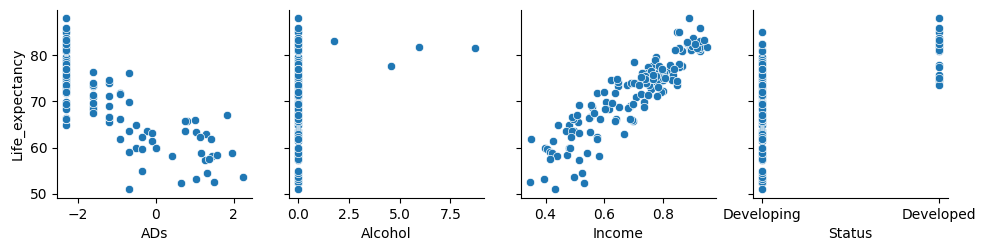

In [ ]:
sns.pairplot(df,
             x_vars=['ADs', 'Alcohol', 'Income','Status'],
             y_vars='Life_expectancy',
             kind='scatter')
plt.show()

Note que há uma relação linear entre as variáveis `ADs` e `life_Expectancy` e entre as variáveis `Income` e `life_Expectancy`. O que se observa com a variável `Status` e `Alcohol`?

In [ ]:
# Correlação linear:
df.corr()[["Life_expectancy"]]

,Life_expectancy
Life_expectancy,1.000000
ADs,-0.793823
Alcohol,0.164781
Income,0.909354


Vamos ajustar um modelo de Regressão linear considerando somente uma variável `Income`. Assim,

$$\text{Life_expectancy} = \beta_0 +\beta_1 \text{Income}$$

In [ ]:
# Fit the resgression line using 'OLS'

model = sm.ols(formula='Life_expectancy ~Income', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     711.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.27e-58
Time:                        13:53:32   Log-Likelihood:                -397.94
No. Observations:                 151   AIC:                             799.9
Df Residuals:                     149   BIC:                             805.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6012      1.280     30.158      0.0

Obseva-se que a variável `Income` é significativa. Por fim, note que o `R-square` é de 0.827. **Adicionando mais variáveis teremos um melhor ajuste?**



In [ ]:
# Fit the resgression line using 'OLS'

model = sm.ols(formula='Life_expectancy ~Income+ ADs + Alcohol',
               data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     346.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.09e-66
Time:                        13:53:32   Log-Likelihood:                -372.75
No. Observations:                 151   AIC:                             753.5
Df Residuals:                     147   BIC:                             765.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.6490      1.286     33.930      0.0

Note que a variável `Alcohol` não é significante (valor-p >0.05) , isso era esperado? Observe que o `R-square` aumentou para 0.876.

**Adicionando variável categóricas no modelo de regressão**

In [ ]:
model = sm.ols(formula='Life_expectancy ~Income+ ADs + Status',
               data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     355.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.71e-67
Time:                        13:53:32   Log-Likelihood:                -370.97
No. Observations:                 151   AIC:                             749.9
Df Residuals:                     147   BIC:                             762.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.2947 

No modelo de regressão é comum deixar uma categoria como referência. Assim, a(s) outra(s) categorias mensuram o efeito de passar da categoria de referência para outra categoria.

**Nosso exemplo:**

A variável `Status` tem duas categorias: Developing e Developed. Note que a variável que está no modelo é `Status[Developing]`, assim, ela está medindo como se altera a variável `life_expectancy` quando passamos de considerar países `Developed` para `Developing`. Observe que tem sinal negativo, indicando que a expectativa de vida média em países em desenvolvimento é menor quando comparada em países desenvolvidos.

$$\text{Life_expectancy} = \beta_0 +\beta_1 \text{Income} + \beta_2 ADs + \beta_3 \text{Status[T.Developing]}$$

Na prática, quando vamos calcular `life_expectancy` usando o modelo acima, substituimos `Status[T.Developing]` por 1, se o país está em desenvolvimento e zero, caso contrário.

In [ ]:
# Valores preditos pelo modelo

df['predicted'] = model.predict(df[["Income","ADs","Status"]])
df.head()

,Country,Continent,Life_expectancy,ADs,Alcohol,Income,Status,predicted
0,Afghanistan,Asia,65.0,-2.302585,0.01,0.479,Developing,65.874427
1,Albania,Europe,77.8,-2.302585,4.60,0.762,Developing,75.451948
2,Algeria,Africa,75.6,-2.302585,0.00,0.743,Developing,74.808934
3,Angola,Africa,52.4,0.641854,0.00,0.531,Developing,61.544354
4,Antigua and Barbuda,North America,76.4,-1.609438,0.00,0.784,Developing,74.762873


Usando o modelo de regressão linear ajustado. Qual é o valor esperado de tempo de vida em países com as seguintes características:
- Income: 0.75
- ADs: 1.5
- Status: Developing

In [ ]:
# Prevendo para novos valores (não estão na base de dados)

new_value=pd.DataFrame({'Income': [0.75],
                        'ADs': 1.5,
                        'Status': "Developing"})

model.predict(new_value)

0    67.181055
dtype: float64

In [ ]:
residuals=model.resid

In [ ]:
# Resíduos

residuals=model.resid
df["res"]=residuals

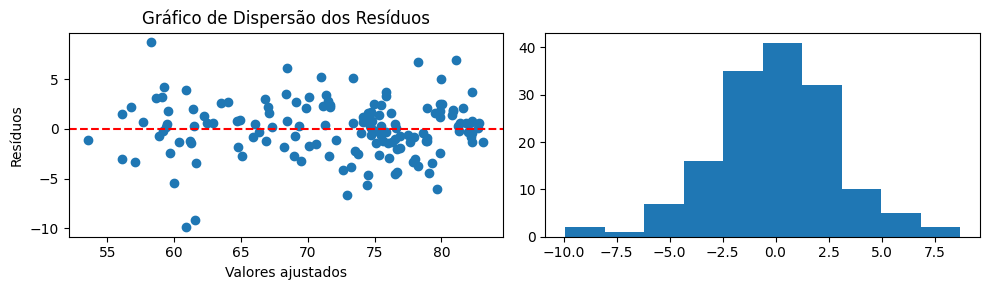

In [ ]:
# Gráfico de dispersão dos resíduos

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(df["predicted"], df["res"])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals)

plt.tight_layout()
plt.show()

Esses gráficos sugerem que os resíduos se desenvolvem aleatóriamente em torno de zero e seguem aproximadamente uma distribuição Normal.

In [ ]:
# Analisando possíveis outliers

df[(df.res<-5) | (df.res>5)].sort_values(by=['res'])

,Country,Continent,Life_expectancy,ADs,Alcohol,Income,Status,predicted,res
123,Sierra Leone,Africa,51.0,-0.693147,0.0,0.431,Developing,60.921216,-9.921216
3,Angola,Africa,52.4,0.641854,0.0,0.531,Developing,61.544354,-9.144354
143,Turkmenistan,Asia,66.3,-2.302585,0.0,0.688,Developing,72.947578,-6.647578
81,Lithuania,Europe,73.6,-2.302585,0.0,0.846,Developed,79.688091,-6.088091
92,Mongolia,Asia,68.8,-2.302585,0.0,0.733,Developing,74.470506,-5.670506
103,Nigeria,Africa,54.5,1.308333,0.0,0.525,Developing,59.962837,-5.462837
38,Cyprus,Europe,85.0,-2.302585,0.0,0.854,Developed,79.958834,5.041166
86,Maldives,Asia,78.5,-2.302585,0.0,0.701,Developing,73.387535,5.112465
70,Jamaica,North America,76.2,-0.693147,0.0,0.729,Developing,71.006379,5.193621
61,Honduras,North America,74.6,-1.203973,0.0,0.623,Developing,68.475566,6.124434
